# Transfer Learning (podstawy) 

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ['OMP_NUM_THREADS'] = "1"

Wczytujemy już gotowy model (to może trochę potrwać), w tym przypadku jest to ResNet50.

In [2]:
model = ResNet50(weights='imagenet')

2022-11-08 11:04:42.679406: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


102973440/102967424 [==============================] - 53s 1us/step


## Dane

Wczytujemy zdjęcie i przygotowujemy dane. Dane wejściowe muszą być 224x224, jeśli zdjęcie będzie inne, automatycznie zostanie zmienione.

In [3]:
img = image.load_img('../input/cat.jpg', target_size=(224, 224))
print(img)

X = np.expand_dims(image.img_to_array(img), axis=0)
print(X.shape)

X = preprocess_input(X)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7FE0A94DFCA0>
(1, 224, 224, 3)


## Predykcja

In [4]:
preds = model.predict(X)
y_pred = decode_predictions(preds, top=3)[0]

y_pred

2022-11-08 11:06:12.457124: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


40960/35363 [==================================] - 0s 1us/step


[('n02123045', 'tabby', 0.6051829),
 ('n02127052', 'lynx', 0.27800566),
 ('n02124075', 'Egyptian_cat', 0.075190455)]

Model zwraca krotkę (ang. *tuple*) z trzema elementami:
- ID klasy
- nazwa (tak po ludzku)
- prawdopodobieństwo (że obiekt/zdjęcie należy do tej klasy)

## Wizualizacja

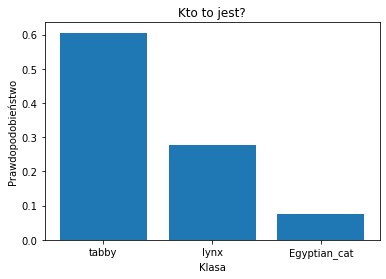

In [5]:
def show_result(y_pred):
    plt.title("Kto to jest?")
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Klasa")

    values = [x[2] for x in y_pred]
    labels = [x[1] for x in y_pred]
    idxs = range(len(values))

    plt.bar( idxs, values )
    plt.xticks(idxs, labels)
    
show_result(y_pred)

## Przydatne linki:
1. [A Comprehensive Hands-on Guide to Transfer Learning with Real-World Applications in Deep Learning](https://bit.ly/3tsZpIQ)
2. [Very deep convolutional networks for large-scale image recognition](https://bit.ly/3f0I2do)